In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Plotting_settings

In [114]:
rubbers = pd.read_csv('data/Rubbers_new.csv') 

## Data Distribution

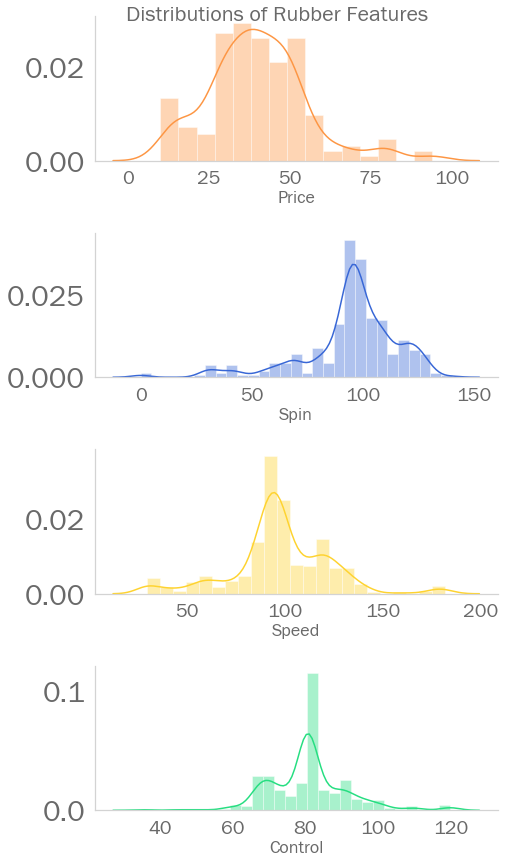

In [234]:
def distributions(data, name):
    dims = (7, 12)
    fig, axs = plt.subplots(4, figsize = dims)
    plt.tight_layout()
    plt.subplots_adjust(hspace = 0.5)
    plt.suptitle('Distributions of {} Features'.format(name), fontsize = 22)
    i = 0
    colors = ['#fd9644', '#3867d6', '#fed330', '#26de81']
    for column in data.iloc[:, 1:]:
        sns.distplot(data[column], ax = axs[i], color = colors[i])
        i+=1
distributions(rubbers, 'Rubber')        

## Are certain Rubber Brands better than others?

In [135]:
#All the brands that make rubbers
brands = ["Butterfly", "XIOM", "DHS", "Tibhar", "Andro", "JOOLA", "Killerspin", "Yasaka",
          "Donic", "Stiga", "RITC", "LKT", "Gambler", "Sanwei", "GEWO", "TSP", "Victas"]

#New Data Frame that will contain all the averages for each feature and each brand
new_rubbers = pd.DataFrame(index = brands, columns= ['Price_avg', 'Spin_avg', 'Speed_avg', 'Control_avg'])

#Create a bar chart with average price, spin, speed, and control for each brand
def combine_brands(data):
    for brand in brands:
        key_values = data['Product_Name'].apply(lambda x: x.find(brand) != -1).sort_values(ascending = False)
        indices = key_values.index[key_values.values == True]
        frame = data.iloc[indices].sort_index()
        new_rubbers.loc[brand,:] = [frame['Price'].mean(), frame['Spin'].mean(),
                                                   frame['Speed'].mean(), frame['Control'].mean()]      
    return new_rubbers

#Function Call
combine_brands(rubbers)

,Price_avg,Spin_avg,Speed_avg,Control_avg
Butterfly,55.6815,85.5319,105.872,80.1364
XIOM,42.3187,93.4667,96.5667,76.9313
DHS,34.6182,97.7493,95.8945,80.1596
Tibhar,48.954,98.6,91.4,73.3
Andro,32.8887,106.581,104.065,82.8387
JOOLA,47.4002,98.1,95.95,83.1091
Killerspin,36.49,92,96.5,90.5
Yasaka,29.4113,85.6129,87.5484,76.7097
Donic,39.8272,100.336,92.4166,69.7753
Stiga,46.325,96,96.6875,69.8589


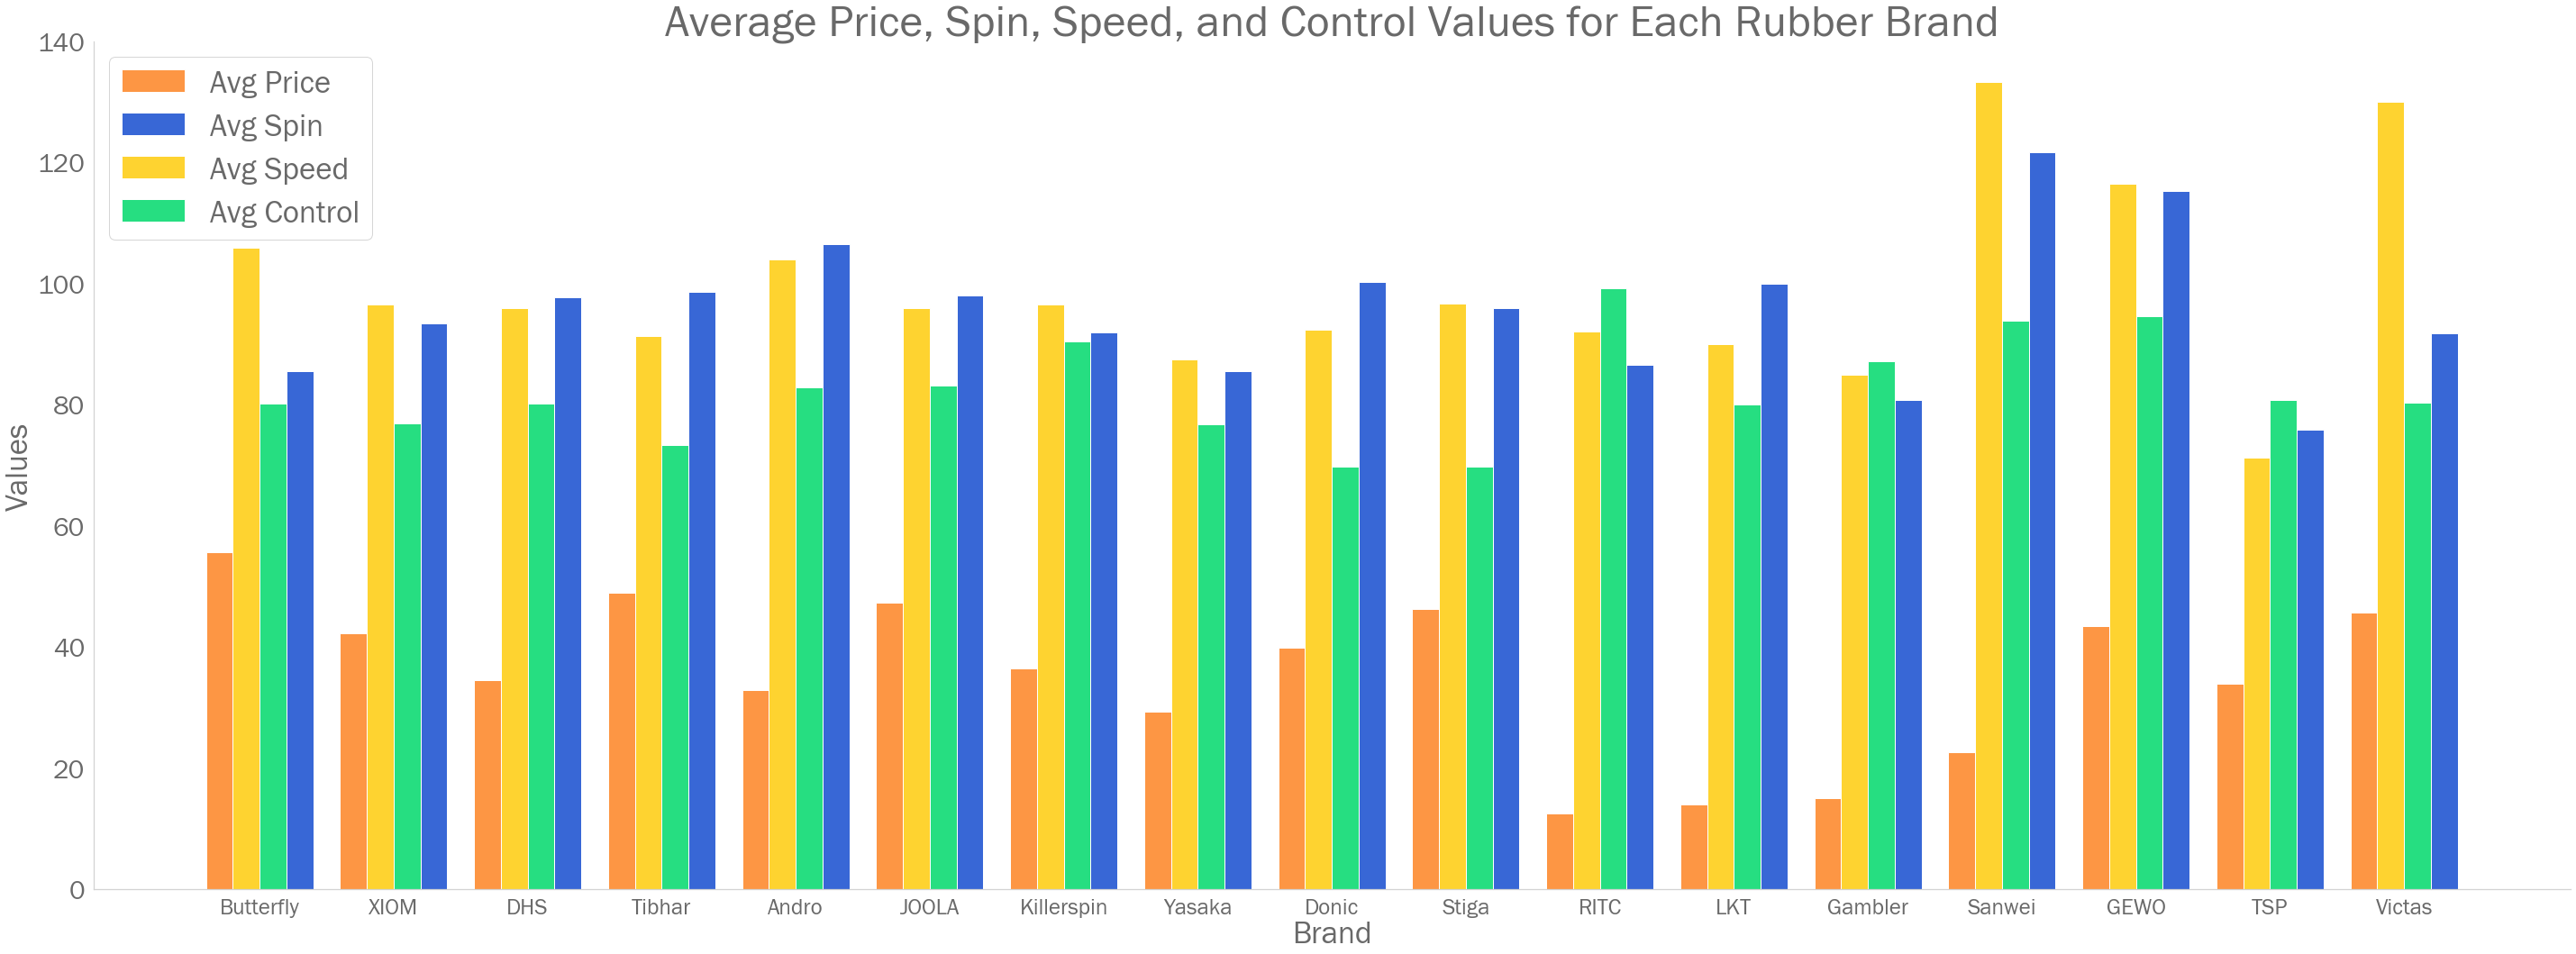

In [231]:
labels = new_rubbers.index

x = np.arange(len(new_rubbers.index)) # the label locations
width = 0.2 # the width of the bars

dims = (40,15)
fig, ax = plt.subplots(figsize = dims)
rects1 = ax.bar(x - width * 1.5, new_rubbers['Price_avg'], width, label='Avg Price', color = '#fd9644')
rects2 = ax.bar(x + width * 1.5, new_rubbers['Spin_avg'], width, label='Avg Spin', color = '#3867d6')
rects3 = ax.bar(x - width/2, new_rubbers['Speed_avg'], width, label='Avg Speed', color = '#fed330')
rects4 = ax.bar(x + width/2, new_rubbers['Control_avg'], width, label='Avg Control', color = '#26de81')


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=35)
ax.set_ylabel('Values', fontsize = 35)
ax.set_xlabel('Brand', fontsize = 35)
ax.set_title('Average Price, Spin, Speed, and Control Values for Each Rubber Brand',fontsize = 50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 25)
ax.legend()

fig.tight_layout()

plt.show()

**Key Takeaways**
- Price: The top 5 cheapest rubbers, on average, includde RITC, LKT, Gambler, Sanwei and Yasaka.
- Spin: Sanwei and GEWO rubbers, on average, provide the most spin.
- Speed: Sanwei and Victas rubbers, on average, are significantly faster than the rest of the brands.
- Control: RITC, Sanwei, and GEWO are the optimal rubbers if you're seeeking control in your game. 

Conclusion: When taking into account all four features, Sanwei rubbers stand out as the most optimal choice, maximizing spin and speed while retaining above average control.

## Price Optimization for Speed, Spin and Control

In [297]:
def get_brand(brand):
    key_values = rubbers['Product_Name'].apply(lambda x: x.find(brand) != -1).sort_values(ascending = False)
    indices = key_values.index[key_values.values == True]
    frame = rubbers.iloc[indices].sort_index()
    return frame

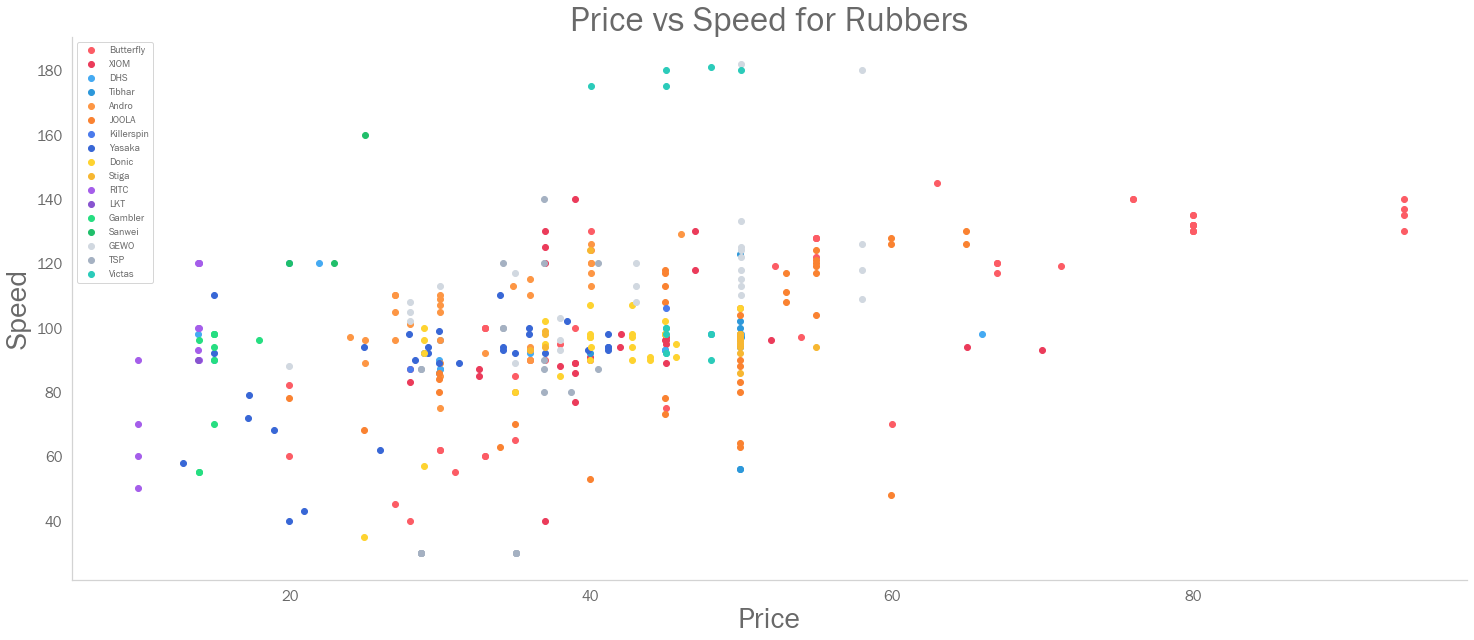

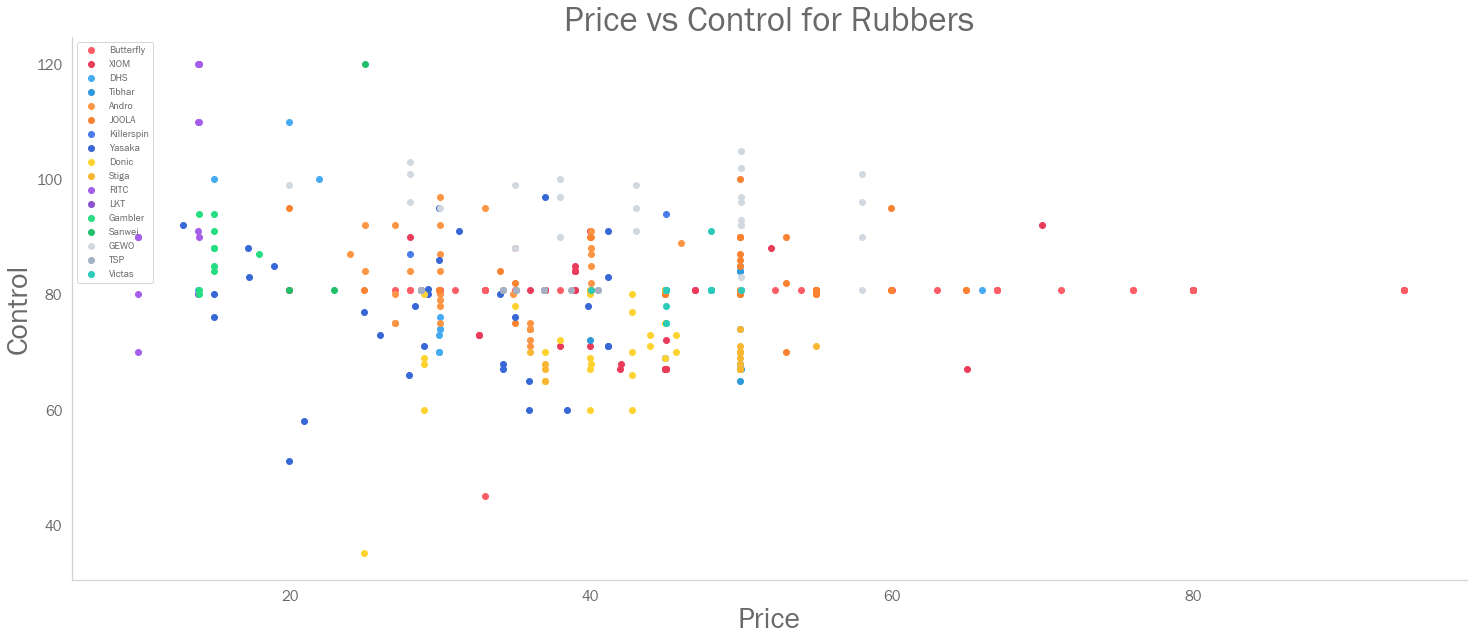

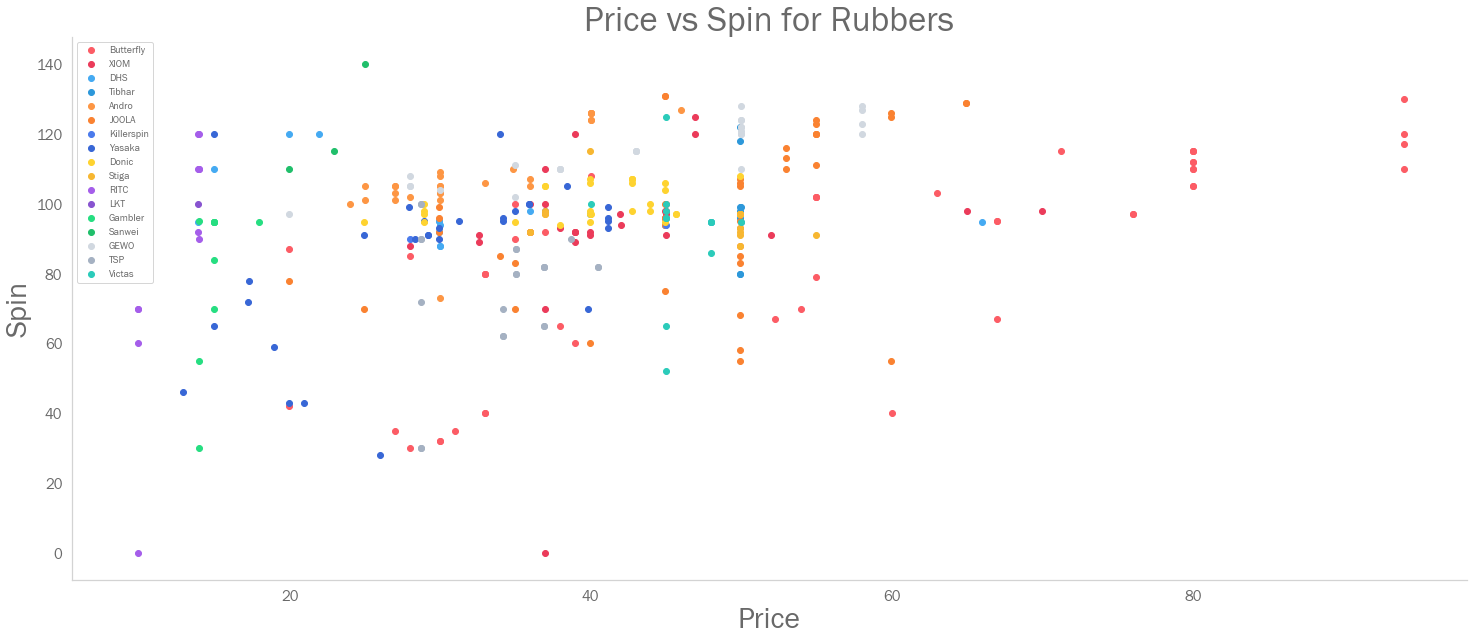

In [319]:
def scatter_plot(data1, data2):    
    plt.figure(figsize = (25,10))
    colors = ["#fc5c65", "#eb3b5a", "#45aaf2", "#2d98da", "#fd9644", "#fa8231", "#4b7bec", "#3867d6", "#fed330", "#f7b731", "#a55eea",
              "#8854d0", "#26de81", "#20bf6b", "#d1d8e0", "#a5b1c2", "#2bcbba", "#0fb9b1", "#778ca3", "#4b6584"]
    i = 0
    for brand in brands:
        data = get_brand(brand)
        plt.scatter(data[data1], data[data2], label = brand, color=colors[i])
        i +=1
    ax.set_ylabel('{}'.format(data2), fontsize = 20)
    ax.set_xlabel('{}'.format(data1), fontsize = 20)
    plt.xlabel('{}'.format(data1), fontsize = 30)
    plt.ylabel('{}'.format(data2), fontsize = 30)
    plt.title("{} vs {} for Rubbers".format(data1, data2), fontsize = 35)
    plt.rc('legend', fontsize=10)
    plt.legend(loc = 'upper left')

scatter_plot('Price', 'Speed')
scatter_plot('Price', 'Control')
scatter_plot('Price', 'Spin')

**Key Takeaways**:
- The Victas and GEWO rubbers are the best for those who want the creme of the crop speed, while also paying a mediocre price.
- While control ratings are quite similiar among rubbers and brands, RITC offers the highest control rubber at a great price.
- Sanwei offers a rubber with the most spin at a price below the mean.